# Machine Learning Model for Predicting the crew size of a ship

This model allows to predict the crew size of a ship using the cruise_ship_info.csv dataset. 
The project is organised as follows:
(a) Data analysis and variable selection;
(b) Regression model;
(c) Hyper-parameters tuning;
(d) techniques for dimensionality reduction.

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read the dataset

In [294]:
df= pd.read_csv("cruise_ship_info.csv")

In [295]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


Sort out the column tags

In [296]:
df = df.rename(columns={'Ship_name':'Ship_Name', 'Cruise_line':'Cruise_Line','passengers':'Passengers', 'length':'Length', 'cabins':'Cabins', 'passenger_density':'Passenger_Density', 'crew':'Crew'})

In [297]:
df.head()

,Ship_Name,Cruise_Line,Age,Tonnage,Passengers,Length,Cabins,Passenger_Density,Crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


## 2.  Dataset Analysis

In [298]:
df.describe()

,Age,Tonnage,Passengers,Length,Cabins,Passenger_Density,Crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


Observation: Variables are on different scales. It is therefore important that when a regression model is built using these variables, variables be brought to same scale either by standardizing or normalizing the data.

### 2.1 Correlation across the available columns in the dataset

In [299]:
cols = ['Age', 'Tonnage', 'Passengers', 'Length', 'Cabins','Passenger_Density','Crew']

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


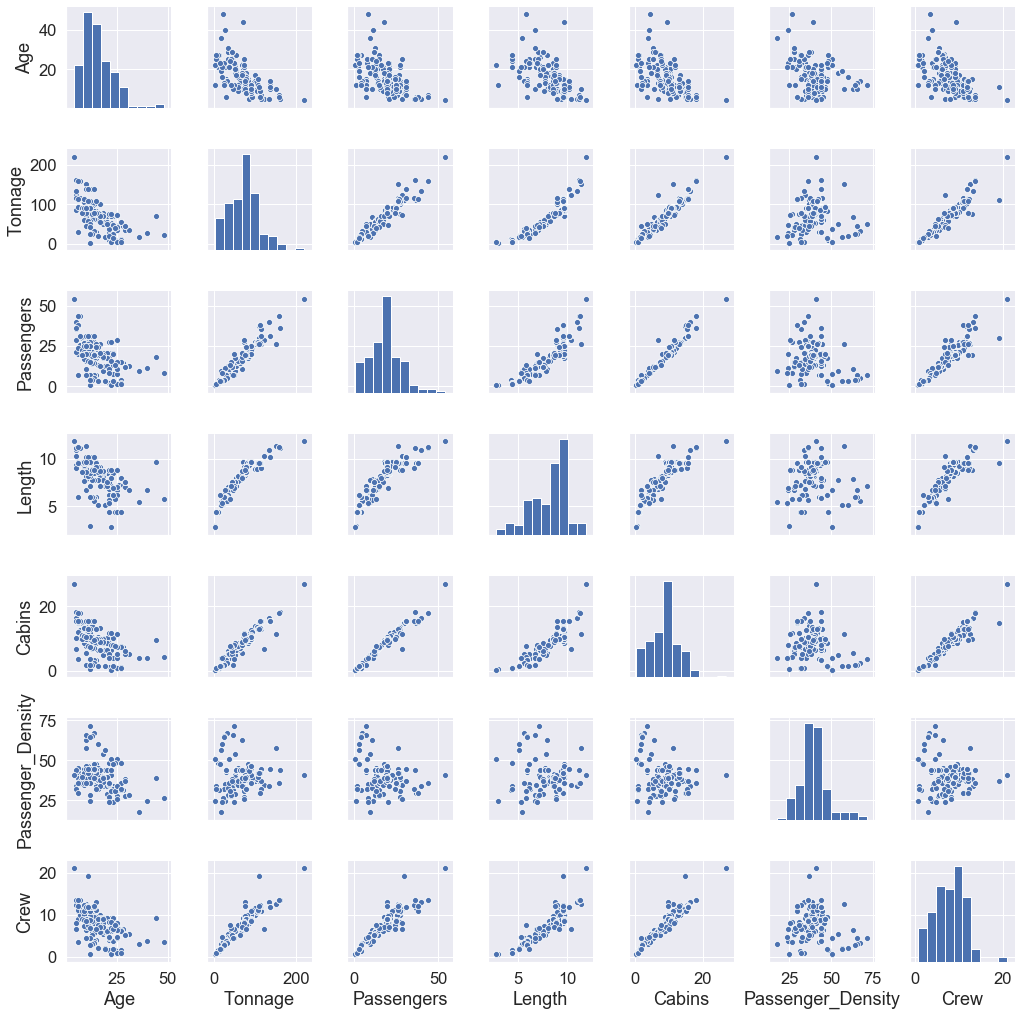

In [300]:
sns.pairplot(df[cols], size=2.0)

Observation:
The variable "Crew" correlates well with "Tonnage", "Passengers", "Length" and "Cabins"

## Probability Distribution

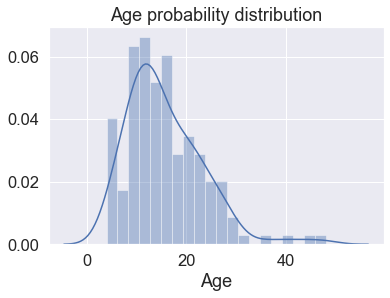

In [301]:
sns.distplot(df['Age'],bins=20)
plt.title('Age probability distribution')
plt.show()

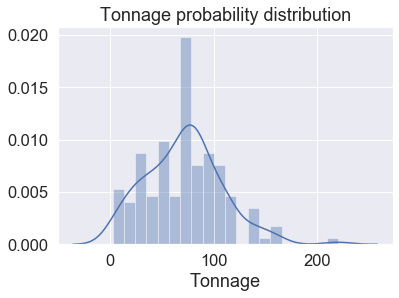

In [302]:
sns.distplot(df['Tonnage'],bins=20)
plt.title('Tonnage probability distribution')
plt.show()

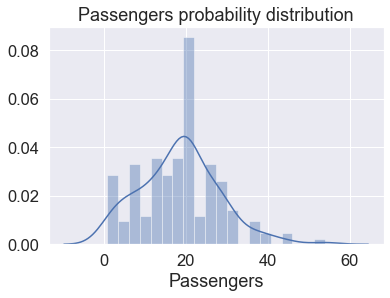

In [303]:
sns.distplot(df['Passengers'],bins=20)
plt.title('Passengers probability distribution')
plt.show()

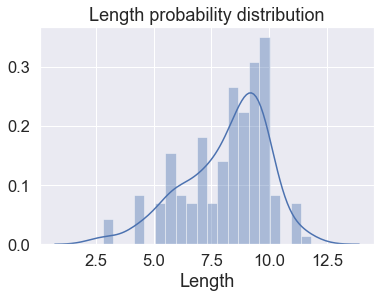

In [304]:
sns.distplot(df['Length'],bins=20)
plt.title('Length probability distribution')
plt.show()

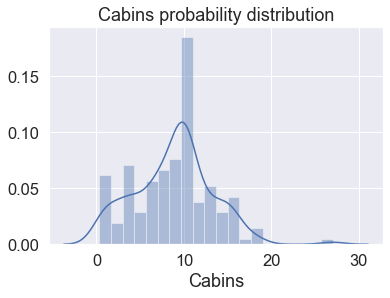

In [305]:
sns.distplot(df['Cabins'],bins=20)
plt.title('Cabins probability distribution')
plt.show()

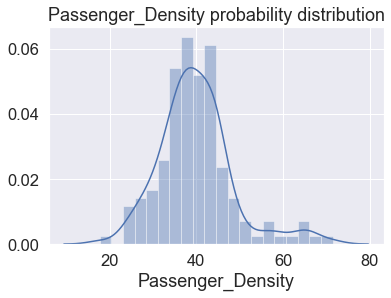

In [306]:
sns.distplot(df['Passenger_Density'],bins=20)
plt.title('Passenger_Density probability distribution')
plt.show()

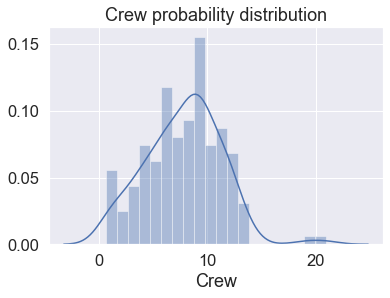

In [307]:
sns.distplot(df['Crew'],bins=20)
plt.title('Crew probability distribution')
plt.show()

## 3. Variable selection for predicting "Crew" size

### 3.1 Calculation of covariance matrix to find relevant variables

In [308]:
cols = ['Age', 'Tonnage', 'Passengers', 'Length', 'Cabins','Passenger_Density','Crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

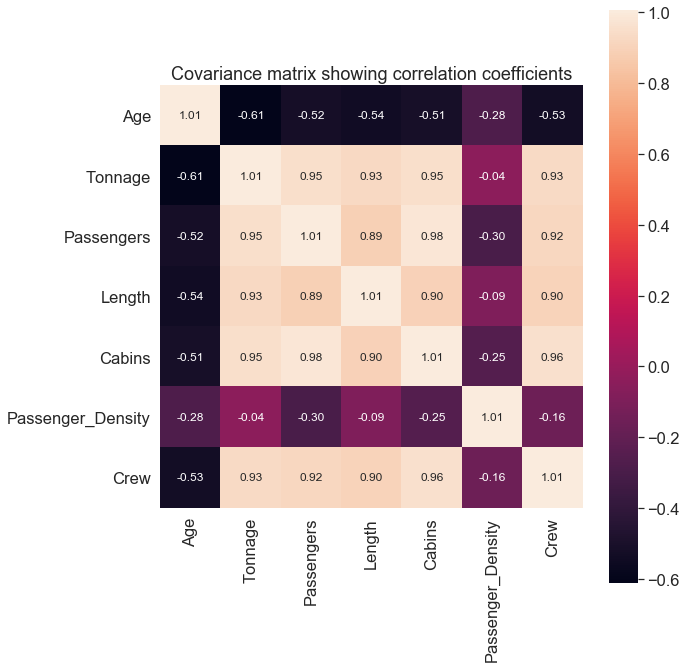

In [309]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

Observation: Also the covariance matrix shows that the "Crew" variable is strongly correlated with the variables "Tonnage", "Passengers", "Length" and "Cabins".

### 3.2 Selecting relevant variables

In [310]:
cols_selected = ['Tonnage', 'Passengers', 'Length', 'Cabins','Crew']

In [311]:
df[cols_selected].head()

,Tonnage,Passengers,Length,Cabins,Crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [312]:
X = df[cols_selected].iloc[:,0:4].values    # features matrix 
y = df[cols_selected]['Crew'].values        # target variable

In [313]:
X.shape

(158, 4)

In [314]:
y.shape

(158,)

## 4. String value process

### 4.1 OneHotEncoder method for categorical features

Machine learning models require all input and output variables to be numeric.
This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.
The two most popular techniques are an Ordinal Encoding and a One-Hot Encoding.

A one-hot encoding is appropriate for categorical data where no relationship exists between categories.
The scikit-learn library provides the OneHotEncoder class to automatically one hot encode one or more variables.
(source: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/)

In [315]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
pd.get_dummies(df[['Ship_Name', 'Cruise_Line','Age', 'Tonnage', 'Passengers', 'Length', 'Cabins','Passenger_Density','Crew']])

,Age,Tonnage,Passengers,Length,Cabins,Passenger_Density,Crew,Ship_Name_Adventure,Ship_Name_Allegra,Ship_Name_Amsterdam,...,Cruise_Line_Oceania,Cruise_Line_Orient,Cruise_Line_P&O,Cruise_Line_Princess,Cruise_Line_Regent_Seven_Seas,Cruise_Line_Royal_Caribbean,Cruise_Line_Seabourn,Cruise_Line_Silversea,Cruise_Line_Star,Cruise_Line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### 4.2 pd.get_dummies method

In [316]:
df2=pd.get_dummies(df[['Ship_Name', 'Cruise_Line','Age', 'Tonnage', 'Passengers', 'Length', 'Cabins','Passenger_Density','Crew']])

In [317]:
df2

,Age,Tonnage,Passengers,Length,Cabins,Passenger_Density,Crew,Ship_Name_Adventure,Ship_Name_Allegra,Ship_Name_Amsterdam,...,Cruise_Line_Oceania,Cruise_Line_Orient,Cruise_Line_P&O,Cruise_Line_Princess,Cruise_Line_Regent_Seven_Seas,Cruise_Line_Royal_Caribbean,Cruise_Line_Seabourn,Cruise_Line_Silversea,Cruise_Line_Star,Cruise_Line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1


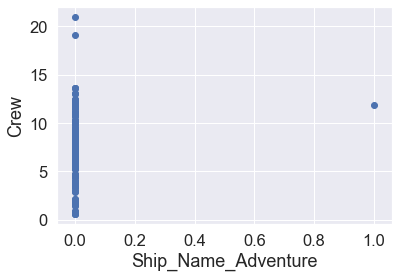

In [318]:
plt.scatter(df2['Ship_Name_Adventure'],df2['Crew'])
plt.xlabel('Ship_Name_Adventure')
plt.ylabel('Crew')
plt.show()

The graph above shows that there isn't correlation across the 'Crew' variable and the names of the ship.
Also in order to build a simplified regression model, we shall focus only on ordinal features. The categorical features "Ship_name" and "Cruise_line" will not be used. 
A simple model built using only the 4 ordinal features "Tonnage", "Passengers", "Length, and "Cabins" will be simple to interpret.

## 5. Data partioning into Training and Test sets 

In [319]:
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['Crew']

In [320]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)


## 6. Building a multi-regression model

Our machine learning regression model for predicting a ship's "crew" size can be expressed as:

$$ \widehat{y}\tiny i \normalsize =w\tiny 0 \normalsize + \sum_{j=1}^4 {X \tiny ij \normalsize w\tiny j}  $$

Where:

$\widehat{y}$ is the predicted size of the crew

j is the number of Variables

In [327]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

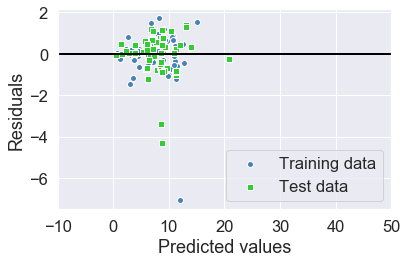

In [328]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

Observation: We can see that Test dataset is not too different from the Training dataset

### Evaluation of the regression model

In [329]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('Mean Square Error MSE train: %.3f, Mean Square Error MSE test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('Coefficient of Determination R^2 train: %.3f, Coefficient of Determination R^2 test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

Mean Square Error MSE train: 0.955, Mean Square Error MSE test: 0.889
Coefficient of Determination R^2 train: 0.920, Coefficient of Determination R^2 test: 0.928


### Regression coefficients

How to determine the intercept $wo$ of the multiregression model

In [330]:
slr.fit(X_train, y_train).intercept_

-0.7525074496158428

How to determine the coefficients $w\tiny j$ of the multiregression model

In [331]:
slr.fit(X_train, y_train).coef_

array([ 0.01902703, -0.15001099,  0.37876395,  0.77613801])

So our model can be defined as: 

$$ Crew = -0.7525 + 0.01903 \cdot Tonnage - 0.1500 \cdot Passengers + 0.3788 \cdot Length +  0.7761 \cdot Cabins  $$

## 7. Feature Standardization, Cross Validation and Hyper-parameter tuning

In machine learning, we can handle various types of data, e.g. audio signals and pixel values for image data, and this data can include multiple dimensions. **Feature standardization** makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. This method is widely used for normalization in many machine learning algorithms (e.g., support vector machines, logistic regression, and artificial neural networks). The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values (mean is already subtracted) of each feature by its standard deviation.

$$ x' = \frac{x - \bar{x}}{\sigma}$$

Where $x$ is the original feature vector, ${ {\bar {x}}={\text{average}}(x)}$ is the mean of that feature vector, and $\sigma$  is its standard deviation.

( https://en.wikipedia.org/wiki/Feature_scaling#:~:text=Feature%20standardization%20makes%20the%20values,%2C%20and%20artificial%20neural%20networks).)

The feature standardization in Python can be applied by the use of the **StandardScaler** command ( https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html )

In [334]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['Crew']  
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()


In [335]:
train_score = []
test_score = []

In [337]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))

In [338]:
train_score

array([0.92028261, 0.91733937, 0.94839385, 0.93899476, 0.90621451,
       0.91156903, 0.92726066, 0.94000795, 0.93922948, 0.93629554])

In [339]:
test_score

array([0.92827978, 0.93807946, 0.8741834 , 0.89901199, 0.94781315,
       0.91880183, 0.91437408, 0.89660876, 0.90427477, 0.90139208])

In [340]:
print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))

R2 train: 0.929 +/- 0.013


In [341]:
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

R2 test: 0.912 +/- 0.021


## 8. Techniques of Dimensionality Reduction

## 8.1 Principal Component Analysis (PCA)

For further info: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

In [342]:
train_score = []
test_score = []
cum_variance = []

In [343]:
for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

In [344]:
train_score

array([0.90411898, 0.9041488 , 0.90416405, 0.92028261])

In [345]:
test_score

array([0.89217843, 0.89174896, 0.89159266, 0.92827978])

In [346]:
cum_variance

array([0.949817  , 0.98322819, 0.99587366, 1.        ])

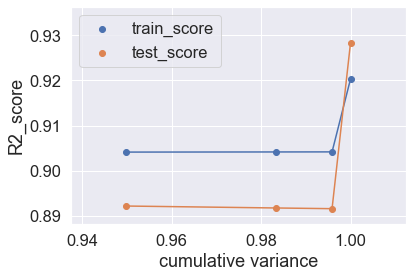

In [347]:
plt.scatter(cum_variance,train_score, label = 'train_score')
plt.plot(cum_variance, train_score)
plt.scatter(cum_variance,test_score, label = 'test_score')
plt.plot(cum_variance, test_score)
plt.xlabel('cumulative variance')
plt.ylabel('R2_score')
plt.legend()
plt.show()

Observations: We observe that by increasing the number of principal components from 1 to 4, the train and test scores improve. This is because with less components, there is high bias error in the model, since model is overly simplified. As we increase the number of principal components, the bias error will reduce, but complexity in the model increases.

## 8.2 Regularized Regression: Lasso (Least Absolute Shrinkage and Selection Operator)

For further info: https://www.mygreatlearning.com/blog/understanding-of-lasso-regression/

In [348]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)

In [349]:
alpha = np.linspace(0.01,0.4,10)

In [350]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.7)

r2_train=[]
r2_test=[]
norm = []
for i in range(10):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std=lasso.predict(X_train_std)
    y_test_std=lasso.predict(X_test_std)
    r2_train=np.append(r2_train,r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test=np.append(r2_test,r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    norm= np.append(norm,np.linalg.norm(lasso.coef_))

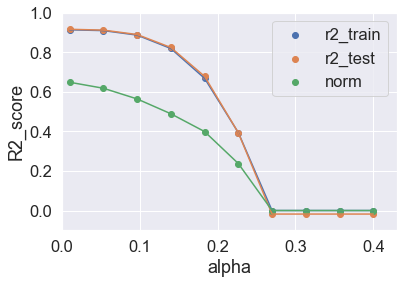

In [351]:
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

Observation: We observe that as the regularization parameter $\alpha$ increases, the norm of the regression coefficients become smaller and smaller. This means more regression coefficients are forced to zero, which intend increases bias error (over simplification). The best value to balance bias-variance tradeoff is when $\alpha$ is kept low, say $\alpha = 0.1$ or less.

Credits and further info:

https://github.com/bot13956/ML_Model_for_Predicting_Ships_Crew_Size/blob/master/Ship_Crew_Size_ML_Model.ipynb
    
https://towardsdatascience.com/understanding-multiple-regression-249b16bde83e